# Introduction
The google collaborate file that you see right now is from Shajenna Raduzzi with student nummer i6191302. 

Everybody in the world took a bit hit, because of the corona virus. Some countries took stronger policies immediately then others. However did these strong policies work in the battle against corona cases , and the fatality rate. In this research is focused on corona cases and the fatality rate, because these values represent how many new cases of corona come every day and how much people died from corona. 

The aim is to reserach whether countries policies influences the new cases of corona and the fatality rate. How does the country policy influence the new cases and the fatality rate in one of the selected countries? How does the one selected country compare to the other selected countries?

# Methods

The objectives are to research first to research per country what the policy were over time. Then compare all the countries to each other and figure out which countries had the 5 most strict policies and the 5 lest strict policies over time. 

The search per selected country the new cases and the fatality rate per 1 000 000 persons , so smaller countries are not excluded expect if their population is less that 1 000 0000. Compare all the values to eacht other. 

Combine the policies with the new cases and fatality rate per country and compare.


# Data preparation 
I want to first import all the methods that I think that I need. The next step is to use the hyperlink from the word document and copy it in. You first have to define the whole set and then make covid general set so you can see the table.

In [1]:
import pandas as pd
import altair as alt 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:

covid_full = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

covid = covid_full.sample(frac=.2, random_state=42)

covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
26169,CAN,North America,Canada,2020-02-12,7.0,0.0,0.286,NaN,NaN,NaN,0.184,0.000,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.000,0.0409,24.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,38067913.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN
91191,MLI,Africa,Mali,2020-03-30,25.0,7.0,3.571,2.0,1.0,0.286,1.199,0.336,0.171,0.096,0.048,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,20855724.0,15.196,16.4,2.519,1.486,2014.306,NaN,268.024,2.42,1.6,23.0,52.232,0.10,59.31,0.434,NaN,NaN,NaN,NaN
71487,IMN,Europe,Isle of Man,2020-03-30,49.0,7.0,5.143,NaN,NaN,NaN,573.703,81.958,60.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85410.0,147.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.40,NaN,NaN,NaN,NaN,NaN
65445,HKG,Asia,Hong Kong,2021-04-25,11736.0,6.0,7.571,209.0,0.0,0.000,1553.861,0.794,1.002,27.672,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79948.0,10.585,NaN,NaN,tests performed,1275189.0,842685.0,432504.0,NaN,22111.0,26297.0,16.88,11.16,5.73,NaN,3482.0,17540.0,0.232,71.30,7552800.0,7039.714,44.8,16.303,10.158,56054.920,NaN,NaN,8.33,NaN,NaN,NaN,NaN,84.86,0.949,NaN,NaN,NaN,NaN
52619,FRA,Europe,France,2022-01-27,18174674.0,392617.0,360360.857,130082.0,269.0,271.714,269565.928,5823.277,5344.856,1929.370,3.990,4.030,1.03,3694.0,54.789,30982.0,459.524,2060.0,30.554,19752.0,292.961,1132265.0,231339319.0,3431.214,16.794,1161303.0,17.224,0.3370,3.0,people tested,135912943.0,53759459.0,51325800.0,31902099.0,266891.0,277827.0,201.59,79.74,76.13,47.32,4121.0,15692.0,0.023,69.44,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,ERI,Africa,Eritrea,2020-12-26,992.0,0.0,34.000,1.0,0.0,0.143,275.444,0.000,9.441,0.278,0.000,0.040,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.81,3601462.0,44.304,19.3,3.607,2.171,1510.459,NaN,311.110,6.05,0.2,11.4,NaN,0.70,66.32,0.459,NaN,NaN,NaN,NaN
22475,BRN,Asia,Brunei,2021-09-12,4163.0,128.0,152.857,21.0,2.0,1

In [4]:
covid['continent'].value_counts()

Africa           7519
Europe           7123
Asia             7049
North America    4786
South America    1858
Oceania          1806
Name: continent, dtype: int64

In [5]:
covid['location'].value_counts()

Peru             176
North America    176
Mexico           174
Russia           173
Kuwait           172
                ... 
Tuvalu            38
Turkmenistan      32
Tokelau           24
Pitcairn          15
Niue               7
Name: location, Length: 238, dtype: int64

In [6]:
covid['iso_code'].value_counts()

PER         176
OWID_NAM    176
MEX         174
RUS         173
KWT         172
           ... 
TUV          38
TKM          32
TKL          24
PCN          15
NIU           7
Name: iso_code, Length: 238, dtype: int64

In [7]:
covid['date'].value_counts()

2022-01-13    69
2021-11-29    64
2021-08-18    63
2021-06-23    62
2022-01-10    60
              ..
2020-01-03     1
2020-01-20     1
2020-01-07     1
2020-01-09     1
2020-01-13     1
Name: date, Length: 760, dtype: int64

In [8]:
covid.isnull().sum()

iso_code                                       0
continent                                   1906
location                                       0
date                                           0
total_cases                                  595
                                           ...  
human_development_index                     5696
excess_mortality_cumulative_absolute       30922
excess_mortality_cumulative                30922
excess_mortality                           30922
excess_mortality_cumulative_per_million    30922
Length: 67, dtype: int64

onderste ga niet proberen

In [9]:
covid.location.value_counts()

Peru             176
North America    176
Mexico           174
Russia           173
Kuwait           172
                ... 
Tuvalu            38
Turkmenistan      32
Tokelau           24
Pitcairn          15
Niue               7
Name: location, Length: 238, dtype: int64

In [10]:
c1 = covid.groupby('location').stringency_index.describe()
c1

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Afghanistan,152.0,36.650395,24.087353,8.33,19.440,27.315,52.31,84.26
Africa,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,139.0,54.344173,15.677738,8.33,45.370,54.630,60.19,89.81
Algeria,139.0,63.691295,17.279258,0.00,51.850,71.300,75.93,92.13
Andorra,137.0,48.797810,9.434617,0.00,44.440,50.000,52.78,65.74
...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,138.0,30.837899,14.426289,12.04,23.150,27.780,35.19,64.81


In [11]:
c1.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Mexico,174.0,51.915690,24.661299,0.00,35.19,64.12,71.76,82.41
Russia,173.0,51.233988,16.119283,8.33,44.91,48.61,58.80,87.04
Kuwait,172.0,62.947209,19.154857,13.89,49.07,70.37,74.07,100.00
Indonesia,170.0,65.177765,8.538996,28.70,62.50,68.06,71.76,74.54
Guatemala,166.0,62.361024,21.117774,11.11,49.54,52.78,87.04,96.30
...,...,...,...,...,...,...,...,...
Europe,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maldives,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
European Union,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
c1.sort_values(by='count', ascending=True)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
French Polynesia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equatorial Guinea,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palau,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oceania,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Northern Cyprus,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Guatemala,166.0,62.361024,21.117774,11.11,49.54,52.78,87.04,96.30
Indonesia,170.0,65.177765,8.538996,28.70,62.50,68.06,71.76,74.54
Kuwait,172.0,62.947209,19.154857,13.89,49.07,70.37,74.07,100.00


# Explore an clean the data
•	Explore those data using descriptive statistics or visualisations to get to know the dataset and spot possible issues (such as outliers or typos)(10 pt)

•	Identify and report issues with missing data. (5 pt)

•	Resolve issues with missing data and clean other data inconsistencies. Report also if you found no issues and how you verified this. (5 pt)


Sort stingency_index from low to high, but do not know in which countries the stringency_index how many times is low . The table also shows missing values.

## Explain why you chose every value

Next I have to select rows and colums relevant to my research question :

stringency_index voor de regelgeving per land 

date 

iso_code

location 

population_density

total_cases

new_cases

new_cases_per_million

total_deaths

new_deats

new_deaths_per_million


In [13]:
cl= covid.loc[:, ['continent', 'iso_code','stringency_index', 'date',  'location', 'population_density', 'total_cases', 'new_cases','new_cases_per_million', 'total_deaths', 'new_deaths', 'new_deaths_per_million']]

cl

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million
26169,North America,CAN,2.78,2020-02-12,Canada,4.037,7.0,0.0,0.000,NaN,NaN,NaN
91191,Africa,MLI,75.00,2020-03-30,Mali,15.196,25.0,7.0,0.336,2.0,1.0,0.048
71487,Europe,IMN,NaN,2020-03-30,Isle of Man,147.872,49.0,7.0,81.958,NaN,NaN,NaN
65445,Asia,HKG,71.30,2021-04-25,Hong Kong,7039.714,11736.0,6.0,0.794,209.0,0.0,0.000
52619,Europe,FRA,69.44,2022-01-27,France,122.578,18174674.0,392617.0,5823.277,130082.0,269.0,3.990
...,...,...,...,...,...,...,...,...,...,...,...,...
44991,Africa,ERI,89.81,2020-12-26,Eritrea,44.304,992.0,0.0,0.000,1.0,0.0,0.000
22475,Asia,BRN,79.63,2021-09-12,Brunei,81.347,4163.0,128.0,289.900,21.0,2.0,4.530
93788,Africa,MUS,82.41,2020-05-05,Mauritius,622.962,332.0,0.0,0.000,10.0,0.0,0.000
149834,Europe,UKR,50.93,2021-09-04,Ukraine,77.390,2395616.0,2614.0,60.138,57236.0,44.0,1.012


In [14]:
cl.isnull().sum()

continent                 1906
iso_code                     0
stringency_index          6863
date                         0
location                     0
population_density        3503
total_cases                595
new_cases                  601
new_cases_per_million      745
total_deaths              4101
new_deaths                4076
new_deaths_per_million    4217
dtype: int64

In [15]:
cd = cl.dropna(thresh=3, subset=['stringency_index', 'new_cases_per_million', 'new_deaths_per_million'])
cd = cd.sort_values(by='iso_code')
cd

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million
7722,North America,ABW,41.67,2021-11-01,Aruba,584.800,15931.0,6.0,55.973,171.0,0.0,0.000
7666,North America,ABW,37.96,2021-09-06,Aruba,584.800,14861.0,49.0,457.111,151.0,1.0,9.329
7327,North America,ABW,54.17,2020-10-02,Aruba,584.800,4038.0,40.0,373.152,30.0,3.0,27.986
7584,North America,ABW,33.33,2021-06-16,Aruba,584.800,11089.0,5.0,46.644,107.0,0.0,0.000
7246,North America,ABW,43.52,2020-07-13,Aruba,584.800,105.0,0.0,0.000,3.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
159858,Africa,ZWE,84.26,2021-01-25,Zimbabwe,42.729,31646.0,326.0,21.601,1075.0,70.0,4.638
160013,Africa,ZWE,64.81,2021-06-29,Zimbabwe,42.729,48533.0,1249.0,82.758,1761.0,12.0,0.795
159787,Africa,ZWE,67.59,2020-11-15,Zimbabwe,42.729,8829.0,43.0,2.849,257.0,0.0,0.000
159595,Africa,ZWE,87.96,2020-05-07,Zimbabwe,42.729,34.0,0.0,0.000,4.0,0.0,0.000


In [16]:
cd.isnull().sum()

continent                   0
iso_code                    0
stringency_index            0
date                        0
location                    0
population_density        411
total_cases                 0
new_cases                   0
new_cases_per_million       0
total_deaths                0
new_deaths                  0
new_deaths_per_million      0
dtype: int64

maybe do stringency_index  selecting in df

In [17]:
cd.head()

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million
7722,North America,ABW,41.67,2021-11-01,Aruba,584.8,15931.0,6.0,55.973,171.0,0.0,0.000
7666,North America,ABW,37.96,2021-09-06,Aruba,584.8,14861.0,49.0,457.111,151.0,1.0,9.329
7327,North America,ABW,54.17,2020-10-02,Aruba,584.8,4038.0,40.0,373.152,30.0,3.0,27.986
7584,North America,ABW,33.33,2021-06-16,Aruba,584.8,11089.0,5.0,46.644,107.0,0.0,0.000
7246,North America,ABW,43.52,2020-07-13,Aruba,584.8,105.0,0.0,0.000,3.0,0.0,0.000


In [18]:
cd.describe()

,stringency_index,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million
count,23038.000000,22627.000000,2.303800e+04,2.303800e+04,23038.000000,23038.000000,23038.000000,23038.000000
mean,56.205329,343.176166,7.239311e+05,3.366848e+03,146.755238,15488.528648,48.358538,1.579914
std,19.491357,1580.041591,3.158341e+06,1.999711e+04,522.869479,57281.510836,194.139855,4.035771
min,0.000000,0.137000,1.000000e+00,-1.979600e+04,-342.571000,1.000000,-117.000000,-75.911000
25%,42.590000,35.308000,6.329000e+03,1.000000e+01,1.037750,98.000000,0.000000,0.000000
50%,56.480000,82.328000,5.039900e+04,1.610000e+02,17.078500,835.000000,2.000000,0.149000
75%,71.300000,204.430000,3.350888e+05,1.184000e+03,110.608750,6294.750000,17.000000,1.365000
max,100.000000,19347.500000,7.499287e+07,1.077190e+06,22842.966000,887824.000000,4329.000000,139.948000


In [19]:
cdl = cd.groupby('location').stringency_index.describe()
cdl

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Afghanistan,148.0,36.984054,24.181782,12.04,19.440,27.315,53.2375,84.26
Albania,134.0,55.853806,13.658602,37.96,46.300,55.555,60.1900,89.81
Algeria,135.0,65.454889,14.086310,36.11,52.780,72.220,75.9300,92.13
Andorra,132.0,50.099091,6.151155,31.48,45.835,51.850,54.1650,65.74
Angola,131.0,63.715191,11.225929,33.33,56.940,62.500,70.3700,90.74
...,...,...,...,...,...,...,...,...
Venezuela,147.0,77.972789,18.643726,28.70,82.410,84.260,87.5000,97.22
Vietnam,111.0,66.883514,10.014296,46.76,58.330,68.520,76.1550,81.02
Yemen,132.0,29.461894,13.182169,12.04,23.150,27.780,34.2600,64.81


In [20]:
cdl.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Indonesia,164.0,66.258049,6.478778,45.37,62.500,68.06,71.7600,74.54
Russia,163.0,53.417301,13.426056,30.09,44.910,49.54,60.6500,87.04
Guatemala,162.0,63.540741,19.950584,39.81,49.540,52.78,87.0400,96.30
Kuwait,161.0,63.342981,18.510482,26.85,49.070,70.37,74.0700,100.00
Italy,158.0,72.945949,7.356532,47.22,67.590,71.30,77.5475,93.52
...,...,...,...,...,...,...,...,...
Timor,60.0,58.388000,18.036757,13.89,44.910,58.80,74.8825,87.04
Vanuatu,52.0,20.670962,2.013525,16.67,19.440,22.22,22.2200,22.22
Dominica,35.0,63.545714,19.626367,37.04,37.040,72.22,79.6300,79.63


In [21]:
cdl.sort_values(by='count', ascending=True)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Solomon Islands,1.0,72.690000,NaN,72.69,72.690,72.69,72.6900,72.69
Greenland,8.0,33.102500,2.200167,28.70,33.335,34.26,34.2600,34.26
Dominica,35.0,63.545714,19.626367,37.04,37.040,72.22,79.6300,79.63
Vanuatu,52.0,20.670962,2.013525,16.67,19.440,22.22,22.2200,22.22
Timor,60.0,58.388000,18.036757,13.89,44.910,58.80,74.8825,87.04
...,...,...,...,...,...,...,...,...
Italy,158.0,72.945949,7.356532,47.22,67.590,71.30,77.5475,93.52
Kuwait,161.0,63.342981,18.510482,26.85,49.070,70.37,74.0700,100.00
Guatemala,162.0,63.540741,19.950584,39.81,49.540,52.78,87.0400,96.30


In [22]:
def select_country_data(iso_code, df):
  return df.loc[df['iso_code'] == iso_code,  ]

In [23]:
interact(select_country_data, iso_code='NLD', df=fixed(cd));

interactive(children=(Text(value='NLD', description='iso_code'), Output()), _dom_classes=('widget-interact',))

look what looks nicer points or lines what is more readable 


In [24]:
import altair as alt
from vega_datasets import data

def visualise_country_data(iso_code, df):
  data_visualise = select_country_data (iso_code, df);
  chart= alt.Chart(data_visualise).mark_line().encode(
      x= 'yearmonth(date):T',
      y= 'stringency_index',
  ).properties(
    width=1000,
    height=300
  )
  display(chart)

callout functie hoort hier niet in

I put the data into graphic for every country. 


# Example

In [25]:
def visualise_country_data(iso_code, df):
  data_visualise = select_country_data (iso_code, df);
  chart= alt.Chart(data_visualise).mark_point().encode(
      x= 'yearmonth(date):T',
      y= 'stringency_index' ,
      color=alt.Color('stringency_index', scale=alt.Scale(scheme='yelloworangered', domain=[0, 120]))
  ).properties(
    width=800,
    height=300
  )
  display(chart)

In [26]:
country_list = cd['iso_code'].unique()
interact(visualise_country_data, iso_code=country_list,df=fixed(cd));

interactive(children=(Dropdown(description='iso_code', options=('ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG…

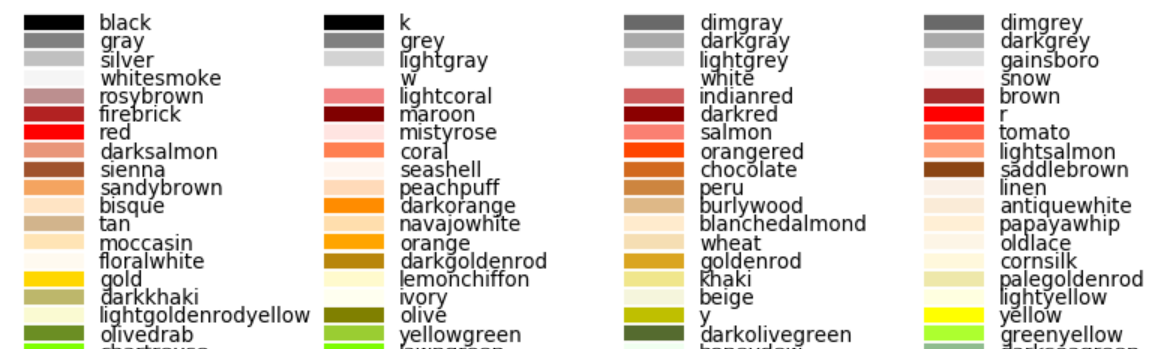

kleur op ordinaal , binden. vanaf 70 +m focussen, binair, nieuwe dummy column wel op niet stingency. 50 kan ook, size , new cases, new fatality, hoe je die erin gaat zetten, een ding specifieceren y1 , y2 rechter , overlay -> encodings , channels , 2 verschillende naast elkaar. onder elkaar  zelfde tijdstip. 

altair kan keuze maken continue van 0 tot 100 , color=stirngency dNA KRJG JE EEN GRADIENT.

gradient is makkelijker zit er al in , nominalen 
https://altair-viz.github.io/user_guide/encoding.html

altair color schemes, -> standaard kelueren dingen, wit naar rood , dan moet variablen binden.  stingency Q die ga je binden , alt.bind , hoe kan je color scheme instemmen of met scale of speciale .  

Now makes grouo for stingency index to visualise better in colors. not dummy variables, of binned 

extra dimensie toevoegen , 
tijd xas lijn geschikt, beginnen met total cases en stingency index samen , lijn kunnen stingency aante geven , lijn kleut maken , quantitave of ordinaal 

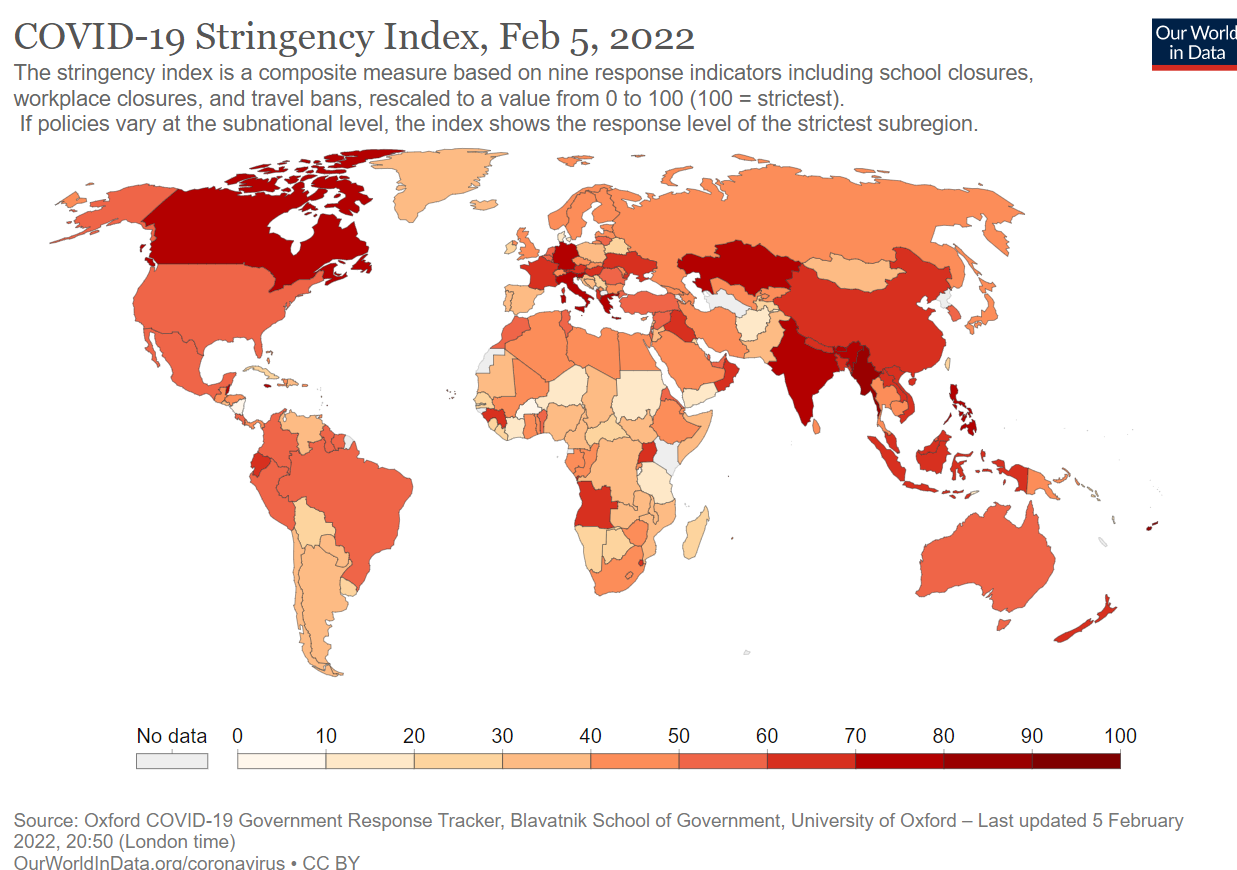

Then look which countries how many times countries have minimised and maximak stingency index

categoriseren 

dummy variables van maak staat in week 10
elk land bij elkaar rekenen elke categori en dan zie top 5 min en max ascending en descending 10 voor check dan 5 

makkelijk kan zien waar veel en weinig plaatsvind 

In [27]:
cd

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million
7722,North America,ABW,41.67,2021-11-01,Aruba,584.800,15931.0,6.0,55.973,171.0,0.0,0.000
7666,North America,ABW,37.96,2021-09-06,Aruba,584.800,14861.0,49.0,457.111,151.0,1.0,9.329
7327,North America,ABW,54.17,2020-10-02,Aruba,584.800,4038.0,40.0,373.152,30.0,3.0,27.986
7584,North America,ABW,33.33,2021-06-16,Aruba,584.800,11089.0,5.0,46.644,107.0,0.0,0.000
7246,North America,ABW,43.52,2020-07-13,Aruba,584.800,105.0,0.0,0.000,3.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
159858,Africa,ZWE,84.26,2021-01-25,Zimbabwe,42.729,31646.0,326.0,21.601,1075.0,70.0,4.638
160013,Africa,ZWE,64.81,2021-06-29,Zimbabwe,42.729,48533.0,1249.0,82.758,1761.0,12.0,0.795
159787,Africa,ZWE,67.59,2020-11-15,Zimbabwe,42.729,8829.0,43.0,2.849,257.0,0.0,0.000
159595,Africa,ZWE,87.96,2020-05-07,Zimbabwe,42.729,34.0,0.0,0.000,4.0,0.0,0.000


In [28]:
cd.isnull().sum()

continent                   0
iso_code                    0
stringency_index            0
date                        0
location                    0
population_density        411
total_cases                 0
new_cases                   0
new_cases_per_million       0
total_deaths                0
new_deaths                  0
new_deaths_per_million      0
dtype: int64

In [29]:
cd['stringency_index_1'] = (cd['stringency_index'] <=10)
cd['stringency_index_2'] = (cd['stringency_index'] <=20)
cd['stringency_index_3'] = (cd['stringency_index'] <=30)
cd['stringency_index_4'] = (cd['stringency_index'] <=40)
cd['stringency_index_5'] = (cd['stringency_index'] <=50)
cd['stringency_index_6'] = (cd['stringency_index'] <=60)
cd['stringency_index_7'] = (cd['stringency_index'] <=70)
cd['stringency_index_8'] = (cd['stringency_index'] <=80)
cd['stringency_index_9'] = (cd['stringency_index'] <=90)
cd['stringency_index_10'] = (cd['stringency_index'] <=100)

cd.head()

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
7722,North America,ABW,41.67,2021-11-01,Aruba,584.8,15931.0,6.0,55.973,171.0,0.0,0.000,False,False,False,False,True,True,True,True,True,True
7666,North America,ABW,37.96,2021-09-06,Aruba,584.8,14861.0,49.0,457.111,151.0,1.0,9.329,False,False,False,True,True,True,True,True,True,True
7327,North America,ABW,54.17,2020-10-02,Aruba,584.8,4038.0,40.0,373.152,30.0,3.0,27.986,False,False,False,False,False,True,True,True,True,True
7584,North America,ABW,33.33,2021-06-16,Aruba,584.8,11089.0,5.0,46.644,107.0,0.0,0.000,False,False,False,True,True,True,True,True,True,True
7246,North America,ABW,43.52,2020-07-13,Aruba,584.8,105.0,0.0,0.000,3.0,0.0,0.000,False,False,False,False,True,True,True,True,True,True


In [30]:

cd['stringency_index_1'] = (cd['stringency_index'] <=10).astype(int)
cd['stringency_index_2'] = (cd['stringency_index'] <=20).astype(int)
cd['stringency_index_3'] = (cd['stringency_index'] <=30).astype(int)
cd['stringency_index_4'] = (cd['stringency_index'] <=40).astype(int)
cd['stringency_index_5'] = (cd['stringency_index'] <=50).astype(int)
cd['stringency_index_6'] = (cd['stringency_index'] <=60).astype(int)
cd['stringency_index_7'] = (cd['stringency_index'] <=70).astype(int)
cd['stringency_index_8'] = (cd['stringency_index'] <=80).astype(int)
cd['stringency_index_9'] = (cd['stringency_index'] <=90).astype(int)
cd['stringency_index_10'] = (cd['stringency_index'] <=100).astype(int)



cd.head()

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
7722,North America,ABW,41.67,2021-11-01,Aruba,584.8,15931.0,6.0,55.973,171.0,0.0,0.000,0,0,0,0,1,1,1,1,1,1
7666,North America,ABW,37.96,2021-09-06,Aruba,584.8,14861.0,49.0,457.111,151.0,1.0,9.329,0,0,0,1,1,1,1,1,1,1
7327,North America,ABW,54.17,2020-10-02,Aruba,584.8,4038.0,40.0,373.152,30.0,3.0,27.986,0,0,0,0,0,1,1,1,1,1
7584,North America,ABW,33.33,2021-06-16,Aruba,584.8,11089.0,5.0,46.644,107.0,0.0,0.000,0,0,0,1,1,1,1,1,1,1
7246,North America,ABW,43.52,2020-07-13,Aruba,584.8,105.0,0.0,0.000,3.0,0.0,0.000,0,0,0,0,1,1,1,1,1,1


exclude stringency_index

In [31]:
cdummy= cd.loc[:, ['location','date','stringency_index_1', 'stringency_index_2', 'stringency_index_3', 'stringency_index_4', 'stringency_index_5', 'stringency_index_6', 'stringency_index_7', 'stringency_index_8', 'stringency_index_9', 'stringency_index_10']]

cdummy

,location,date,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
7722,Aruba,2021-11-01,0,0,0,0,1,1,1,1,1,1
7666,Aruba,2021-09-06,0,0,0,1,1,1,1,1,1,1
7327,Aruba,2020-10-02,0,0,0,0,0,1,1,1,1,1
7584,Aruba,2021-06-16,0,0,0,1,1,1,1,1,1,1
7246,Aruba,2020-07-13,0,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
159858,Zimbabwe,2021-01-25,0,0,0,0,0,0,0,0,1,1
160013,Zimbabwe,2021-06-29,0,0,0,0,0,0,1,1,1,1
159787,Zimbabwe,2020-11-15,0,0,0,0,0,0,1,1,1,1
159595,Zimbabwe,2020-05-07,0,0,0,0,0,0,0,0,1,1


their is a where you can combine the two countries with dummy 
maybe make seperate table without the date so the countries can combine eventually week 8

check bij geselecteerde landen hoeveel data missed overal 

combination try country and dummy

data combination

use groupby function , maybe need to put in formula value_counts

In [32]:
cx = cdummy.groupby(['location']).sum()
cx

,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
location,,,,,,,,,,
Afghanistan,0,47,88,99,108,117,121,141,148,148
Albania,0,0,0,21,51,72,117,122,134,134
Algeria,0,0,0,12,23,50,62,124,132,135
Andorra,0,0,0,2,64,130,132,132,132,132
Angola,0,0,0,6,8,51,94,127,128,131
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,13,19,19,19,19,23,145,147
Vietnam,0,0,0,0,8,31,63,110,111,111
Yemen,0,28,73,121,121,123,132,132,132,132


In [33]:
print('number of samples are: ', cx.shape)

number of samples are:  (178, 10)


In [34]:
cu= cx.sort_values(by=['stringency_index_1', 'stringency_index_2', 'stringency_index_3', 'stringency_index_4', 'stringency_index_5', 'stringency_index_6', 'stringency_index_7', 'stringency_index_8', 'stringency_index_9', 'stringency_index_10'], ascending=False).head(n=5)
cu

,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
location,,,,,,,,,,
Nicaragua,71,108,122,122,122,122,122,122,122,122
Tanzania,50,111,124,141,147,155,155,155,155,155
Burundi,12,123,130,130,130,130,130,130,130,130
Cote d'Ivoire,4,46,80,91,91,91,113,113,126,126
Somalia,3,8,31,99,104,114,126,126,126,126


In [35]:
ci= cx.sort_values(by=['stringency_index_1', 'stringency_index_2', 'stringency_index_3', 'stringency_index_4', 'stringency_index_5', 'stringency_index_6', 'stringency_index_7', 'stringency_index_8', 'stringency_index_9', 'stringency_index_10'], ascending=True).head(n=5)
ci

,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
location,,,,,,,,,,
Solomon Islands,0,0,0,0,0,0,0,1,1,1
Jamaica,0,0,0,0,0,0,34,116,131,131
Myanmar,0,0,0,0,0,1,24,77,131,137
Kazakhstan,0,0,0,0,0,15,53,106,125,130
Suriname,0,0,0,0,0,25,53,89,124,132



The search per selected country the new cases and the fatality rate per 1 000 000 persons , so smaller countries are not excluded expect if their population is less that 1 000 0000. Compare all the values to eacht other. 
soort van standarisatie, want anders moet bij ieder land een berekening doe voor populatie 100 000


consideren of precieze datum wil dat inging 

In [36]:
# Make new data out of cd and select the 10 countries 
covid_selected_countries_1 = cd.loc[cd['location'].isin(['Myanmar', 'Honduras', 'Turkmenistan', 'China', 'Belize', 'Nicaragua', 'Tanzania', 'Peru', 'Mexico', 'Thailand'])]
covid_selected_countries= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])
covid_selected_countries

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
15031,North America,BLZ,76.85,2020-05-02,Belize,16.426,18.0,0.0,0.000,2.0,0.0,0.000,0,0,0,0,0,0,0,1,1,1
15041,North America,BLZ,76.85,2020-05-12,Belize,16.426,18.0,0.0,0.000,2.0,0.0,0.000,0,0,0,0,0,0,0,1,1,1
15042,North America,BLZ,76.85,2020-05-13,Belize,16.426,18.0,0.0,0.000,2.0,0.0,0.000,0,0,0,0,0,0,0,1,1,1
15043,North America,BLZ,76.85,2020-05-14,Belize,16.426,18.0,0.0,0.000,2.0,0.0,0.000,0,0,0,0,0,0,0,1,1,1
15045,North America,BLZ,85.19,2020-05-16,Belize,16.426,18.0,0.0,0.000,2.0,0.0,0.000,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142848,Africa,TZA,8.33,2022-01-05,Tanzania,64.699,30564.0,1258.0,20.456,740.0,3.0,0.049,1,1,1,1,1,1,1,1,1,1
142850,Africa,TZA,8.33,2022-01-07,Tanzania,64.699,30564.0,0.0,0.000,740.0,0.0,0.000,1,1,1,1,1,1,1,1,1,1
142851,Africa,TZA,8.33,2022-01-08,Tanzania,64.699,30564.0,0.0,0.000,740.0,0.0,0.000,1,1,1,1,1,1,1,1,1,1
142860,Africa,TZA,8.33,2022-01-17,Tanzania,64.699,31395.0,831.0,13.513,745.0,5.0,0.081,1,1,1,1,1,1,1,1,1,1


In [37]:
# iso_code = ['MMR', 'HND', 'TKM', 'CHN', 'BLZ', 'NIC', 'TZA', 'PER', 'MEX', 'THA']
# location= ['Myanmar', 'Honduras', 'Turkmenistan', 'China', 'Belize', 'Nicaragua', 'Tanzania', 'Peru', 'Mexico', 'Thailand']

In [38]:
interact(select_country_data, iso_code= [('Myanmar', 'MMR'), 
                                           ('Honduras', 'HND') ,
                                           ('Turkmenistan', 'TKM'),
                                           ('China', 'CHN'),
                                           ('Belize', 'BLZ'),
                                           ('Nicaragua', 'NIC'),
                                           ('Tanzania', 'TZA'),
                                           ('Peru', 'PER'),
                                           ('Mexico', 'MEX'),
                                           ('Thailand', 'THA')] , df=fixed(covid_selected_countries));

interactive(children=(Dropdown(description='iso_code', options=(('Myanmar', 'MMR'), ('Honduras', 'HND'), ('Tur…

In [39]:
# If I want to go into the precise dates. I will consider loc has easier option. I will look at general date every country 

In [40]:
interact(visualise_country_data, iso_code=[('Myanmar', 'MMR'), 
                                           ('Honduras', 'HND') ,
                                           ('Turkmenistan', 'TKM'),
                                           ('China', 'CHN'),
                                           ('Belize', 'BLZ'),
                                           ('Nicaragua', 'NIC'),
                                           ('Tanzania', 'TZA'),
                                           ('Peru', 'PER'),
                                           ('Mexico', 'MEX'),
                                           ('Thailand', 'THA')],df=fixed(covid_selected_countries));

interactive(children=(Dropdown(description='iso_code', options=(('Myanmar', 'MMR'), ('Honduras', 'HND'), ('Tur…

In [41]:
country_list = [('Myanmar', 'MMR'), 
                     ('Honduras', 'HND') ,
                     ('Turkmenistan', 'TKM'),
                     ('China', 'CHN'),
                     ('Belize', 'BLZ'),
                     ('Nicaragua', 'NIC'),
                     ('Tanzania', 'TZA'),
                     ('Peru', 'PER'),
                     ('Mexico', 'MEX'),
                     ('Thailand', 'THA')]

In [42]:
import altair as alt
from vega_datasets import data
def visualise_country_data(iso_code, df):
  data_visualise = select_country_data (iso_code, df);
  line= alt.Chart(data_visualise).mark_line().encode(
      x= 'yearmonth(date):T',
      y= 'stringency_index',
  ).properties(
    width=1000,
    height=300
  )
  
  display(line)

In [43]:
NLD = visualise_country_data('NLD', cd)

alt.Chart(...)

In [44]:
country_list_1 = cd['iso_code'].unique()
interact(visualise_country_data, iso_code=country_list_1,df=fixed(cd));

interactive(children=(Dropdown(description='iso_code', options=('ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG…

In [45]:
ds = covid_selected_countries[covid_selected_countries['stringency_index']==covid_selected_countries['stringency_index'].max()]
ds

,continent,iso_code,stringency_index,date,location,population_density,total_cases,new_cases,new_cases_per_million,total_deaths,new_deaths,new_deaths_per_million,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
64313,North America,HND,100.0,2020-04-05,Honduras,82.805,268.0,4.0,0.397,22.0,7.0,0.696,0,0,0,0,0,0,0,0,0,1
64319,North America,HND,100.0,2020-04-11,Honduras,82.805,392.0,10.0,0.994,24.0,1.0,0.099,0,0,0,0,0,0,0,0,0,1
64328,North America,HND,100.0,2020-04-20,Honduras,82.805,477.0,5.0,0.497,46.0,0.0,0.000,0,0,0,0,0,0,0,0,0,1
64329,North America,HND,100.0,2020-04-21,Honduras,82.805,494.0,17.0,1.689,46.0,0.0,0.000,0,0,0,0,0,0,0,0,0,1
64330,North America,HND,100.0,2020-04-22,Honduras,82.805,510.0,16.0,1.590,46.0,0.0,0.000,0,0,0,0,0,0,0,0,0,1
64331,North America,HND,100.0,2020-04-23,Honduras,82.805,519.0,9.0,0.894,47.0,1.0,0.099,0,0,0,0,0,0,0,0,0,1
64341,North America,HND,100.0,2020-05-03,Honduras,82.805,1055.0,45.0,4.472,82.0,6.0,0.596,0,0,0,0,0,0,0,0,0,1
64342,North America,HND,100.0,2020-05-04,Honduras,82.805,1178.0,123.0,12.223,83.0,1.0,0.099,0,0,0,0,0,0,0,0,0,1
64351,North America,HND,100.0,2020-05-13,Honduras,82.805,2255.0,175.0,17.390,123.0,2.0,0.199,0,0,0,0,0,0,0,0,0,1
64358,North America,HND,100.0,2020-05-20,Honduras,82.805,2955.0,0.0,0.000,147.0,0.0,0.000,0,0,0,0,0,0,0,0,0,1


In [46]:
print('number of samples are: ', ds.shape)

number of samples are:  (12, 22)


maybe make for each counrty max a seperate table en then put this table together with line 

# datum ingang 
consider loc of iloc en dan hogere values ,  -> kan niet

plotten , verticale punt op dit moment werd de policy geimplementeerd 

Combine the policies with the new cases and fatality rate per country and compare.n week 11

# Describe and visuealise
•	Provide a description of the population for the reader (e.g. countries or continents) relevant to your question using a table with descriptive statistics (i.e. means, medians, standard deviations) and where possible visualisation. (15pt)

•	Make the report interactive: Create at least one interactive visualisation using input from the user. (20pt)

•	Turn your interactive report into an application using GitHub, Voila and Binder.** (15pt)


interactive point can be put in a date, country, or list on what date in which country was which stringley index

# Conclusion
Summarise the work and the main findings related to the initial research question (5p)

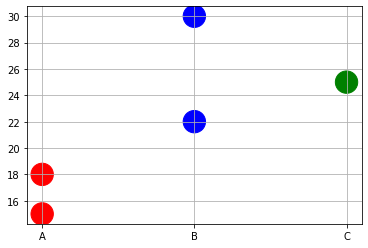

In [47]:
x=['A', 'B', 'C', 'A', 'B']
y=[15,30,25,18,22]

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='A' :
            cols.append('red')
        elif l=='B':
            cols.append('blue')
        else:
            cols.append('green')
    return cols
cols=pltcolor(x)

plt.scatter(x=x, y=y, s=500,c=cols)
plt.grid(True)
plt.show()

In [48]:
def visualise_country_data(iso_code, df):
  data_visualise = select_country_data (iso_code, df);
  chart= alt.Chart(data_visualise).mark_point().encode(
      x= 'yearmonth(date):T',
      y= 'stringency_index' ,
      color=alt.Color('stringency_index', scale=alt.Scale(scheme='yelloworangered', domain=[0, 120]))
  ).properties(
    width=800,
    height=300
  )
  display(chart)

In [49]:
  callout = alt.Chart(covid_selected_countries[2:100]).mark_point(
    color='red', size=300, tooltip="Tooltip text here"
  ).encode(
      x= 'yearmonth(date):T',
      y= 'stringency_index' ,
  )

In [50]:


line= alt.Chart(covid_selected_countries).mark_line().encode(
      x= 'yearmonth(date):T',
      y= 'stringency_index' ,
    color='location'
)

callout = alt.Chart(covid_selected_countries[7:20]).mark_point(
    color='red', size=300, tooltip="Tooltip text here"
).encode(
      x= 'yearmonth(date):T',
      y= 'stringency_index' ,
)

line + callout

alt.LayerChart(...)